<h1 align="center"> A Look into TMDB Movie Dataset </h1>

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclude">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction


This [TMDB](https://www.themoviedb.org/) dataset consist of 10,000 movies that are also available in [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata). It's a community built movie and TV database collected since 2008 and updated every single day. They containts complete metadata such as cast, revenue, movie ratings, etc that are greate for digging a lot of questions.

Some of the questions that we can explore are:
> <li><a href="#q1">What is the most consisten major film studios? Has they improved or decline throughout the years?</a></li>
> <li><a href="#q2">How many total unique movies are there? Are the same movies will impact their revenue? Are they closely related with their release date?</a></li>
> <li><a href="#q3">Are the popular actor can also make a movie more popular? How about their ratings?</a></li>

<a id='wrangle'></a>
## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.5)
pd.set_option('display.max_rows', 30)
%matplotlib inline

### General Properties

In [2]:
df_movie = pd.read_csv('data/tmdb-movies.csv')
print(df_movie.shape)
df_movie.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_movie.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
df_movie.duplicated().sum()

1

In [6]:
def plot_null_values(data, return_df=True):
    
    null_summary = data.isnull().sum()
    print(null_summary[null_summary > 0].sort_values(ascending=False)) if return_df else None

    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
dtype: int64


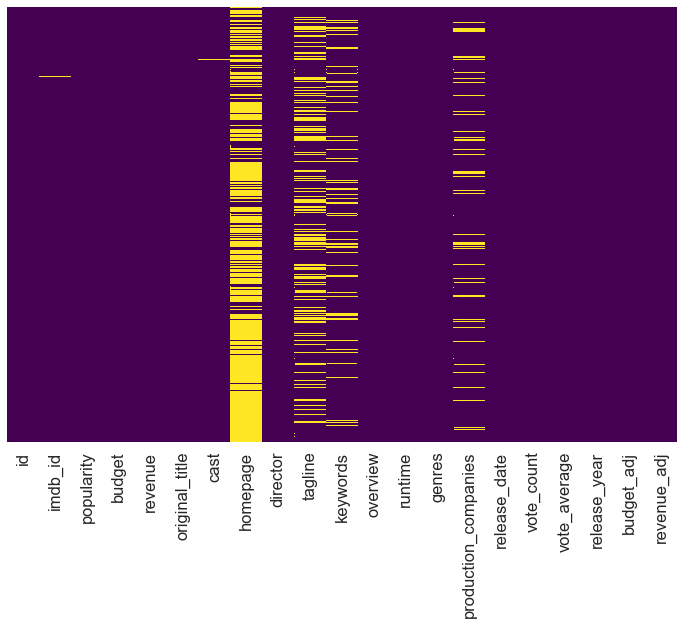

In [7]:
plot_null_values(df_movie)

### Null Values and Duplicates

Since from the visualization of null values, all of the columns that are nulls are categorical ones (string) and imputing them does not make sense (e.g. fill them with Mode). If the production_companies does not exist, fill them with the most popular studio with Mode will give wrong interpretation. Hence they will be dropped with some columns completely removed (see below).

### Columns Subset

We dropped the these columns for the following reasongs:
- `homepage`: Most of movies does not have a homepage, since they used other channel/websites for promotions
- `budget_adj` & `revenue_adj`: We can use either these columns or the renue and budget columns, because we just need one source of truth. But since they are in terms of 2010 dollars, we use the the latter column pairs.
- `id`: not much usefull since id and imdb_id are essentially convey the same unique movies
- `keywords` & `tagline`: We won't be analyzing keywords and tagline currently and they contain quite some null values. If these rows were to be removed, some useful movie data will be gone. So they will be dropped before we remove some null values. 
- `overview`, this contains some long information or summary about the movie that we don't need

Series([], dtype: int64)
(9770, 13)


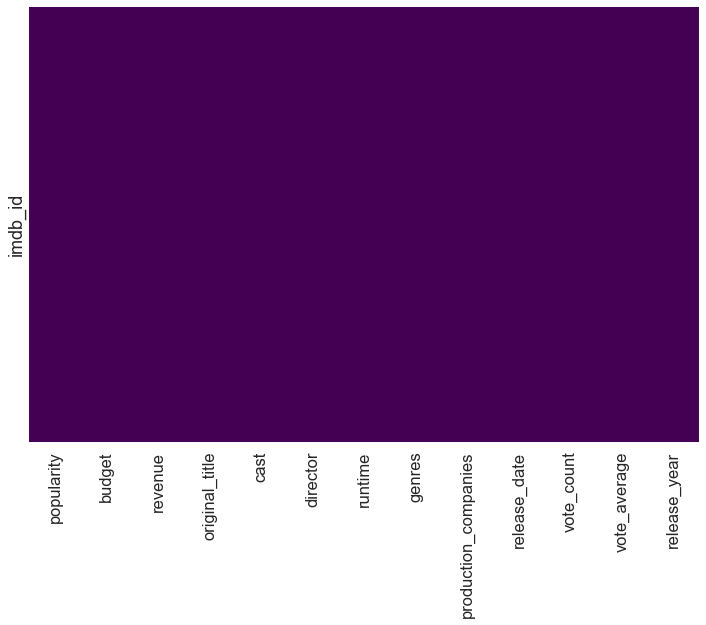

In [8]:
# drop unused columns
df_movie.drop(columns=['id', 'homepage', 'budget_adj', 'revenue_adj', 'keywords', 'tagline', 'overview'], inplace=True)

# null values treatment
df_movie.dropna(inplace=True) # drop the rest 

# drop duplicates
df_movie.drop_duplicates(inplace=True)

df_movie.set_index('imdb_id', inplace=True) # set imdb_id as index

plot_null_values(df_movie)
print(df_movie.shape)

Now we are free from duplicates and null values! Now we will go to the next step to see if some of the columns can be transformed to help us answer the question.

### Data Transformation

In [9]:
df_movie.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
imdb_id,,,,,,,,,,,,,
tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [10]:
df_movie.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

It looks like the `cast`, `genres`, and `production_companies` are joined using `|` or pipe operator and separate them for each movie id can be usefull for analysis. The `release_date` column are also still in strings, it should be easier if they are in a datetime format. The rest of the columns are fine as they are.

The steps to transform the are as follow:
1. Create separate table for `cast`, `genres`, and `production_companies` and dropped the original column from the main table.
2. Convert `release_date` into datetime format.

First we create a function to separate these nasty columns, a **map-reduce function** from python can do it combined with **apply method** from pandas.

In [11]:
df_movie.cast[0]

"Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"

In [12]:
from functools import reduce

def get_unnest_table(data, colname, keyname=None):
    keyname = data[colname].index.name if not keyname else keyname
    series_dict = data[colname].apply(lambda x: x.split('|')).to_dict()
    mapped_reduce_dict = reduce(lambda l1, l2: l1+l2, list(
                                map(lambda kv: list(
                                map(lambda c: {colname: c, keyname: kv[0]}, kv[1])), 
                                    series_dict.items())), 
                                [])
    return pd.DataFrame(mapped_reduce_dict)

In [13]:
cast_table = get_unnest_table(df_movie, colname='cast')
cast_table.query('imdb_id == "tt0369610"')

,cast,imdb_id
0,Chris Pratt,tt0369610
1,Bryce Dallas Howard,tt0369610
2,Irrfan Khan,tt0369610
3,Vincent D'Onofrio,tt0369610
4,Nick Robinson,tt0369610


Seems like our mapping are correct, we will create the rest of the tables and also convert the `release_date` column.

In [14]:
genres_table = get_unnest_table(df_movie, colname='genres')
production_table = get_unnest_table(df_movie, colname='production_companies')

# remove the original column
df_movie.drop(columns=['cast', 'genres', 'production_companies'], inplace=True)

Converting the release date column will be trick, since using `pd.to_datetime()` method will make a movie in year less than 2000 for example 1966 will be 2066 which is wrong.

In [15]:
# extract year and concatenate them back
release_year = df_movie['release_date'].apply(lambda x: '19'+x[-2:] if int(x[-2:]) >= 18 else '20'+x[-2:])
df_movie['release_date'] = pd.to_datetime(df_movie['release_date'].apply(lambda x: x[:-2]) + release_year)
df_movie.release_date

imdb_id
tt0369610   2015-06-09
tt1392190   2015-05-13
tt2908446   2015-03-18
tt2488496   2015-12-15
tt2820852   2015-04-01
               ...    
tt0060371   1966-06-15
tt0060472   1966-12-21
tt0060161   1966-01-01
tt0061177   1966-11-02
tt0060666   1966-11-15
Name: release_date, Length: 9770, dtype: datetime64[ns]

In [16]:
df_movie.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
director                  object
runtime                    int64
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

Now we should be ready for data analysis and answering question!

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### 1. How many total unique movies are there? Are similar movie titles will impact their revenue? Are they closely related with their release date? How about their ratingsl

Let's take a look to our ratings and their associated count distribution, because most movies which have high rating does not mean have enough reliable counts (e.g only 2 people rate the movie 9/10)

In [17]:
df_movie.loc[:, ['vote_count', 'vote_average']].describe()

,vote_count,vote_average
count,9770.000000,9770.000000
mean,239.353224,5.963388
std,603.066348,0.913207
min,10.000000,1.500000
25%,18.000000,5.400000
50%,46.000000,6.000000
75%,173.000000,6.600000
max,9767.000000,8.700000


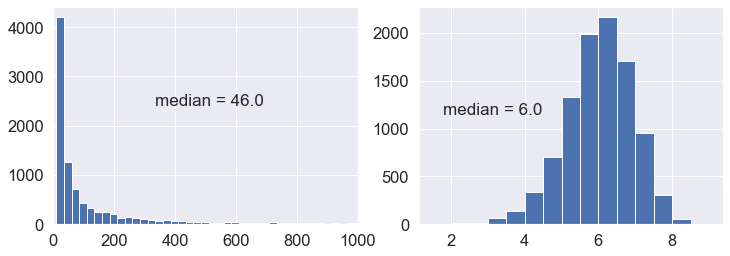

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))


bins1 = np.arange(df_movie.vote_count.min(), df_movie.vote_count.max()+25, 25)
ax1.hist(df_movie.vote_count, bins=bins1)
ax1.set(xlim=(0, 1000))
ax1.text(1000/3, 4800/2, 'median = {}'.format(df_movie.vote_count.median()), fontsize=17)

bins2 = np.arange(df_movie.vote_average.min(), df_movie.vote_average.max()+0.5, 0.5)
ax2.hist(df_movie.vote_average, bins=bins2)
ax2.text(9/5, 2300/2, 'median = {}'.format(df_movie.vote_average.median()), fontsize=17);

As I've suspected, the count distribution are heavily right skewed with most of it's distribution centered to under 100 count only. This can mean the movie is not that popular (indie movie) or have their own fanbase. While the rating distribution looks almost normally distributed.

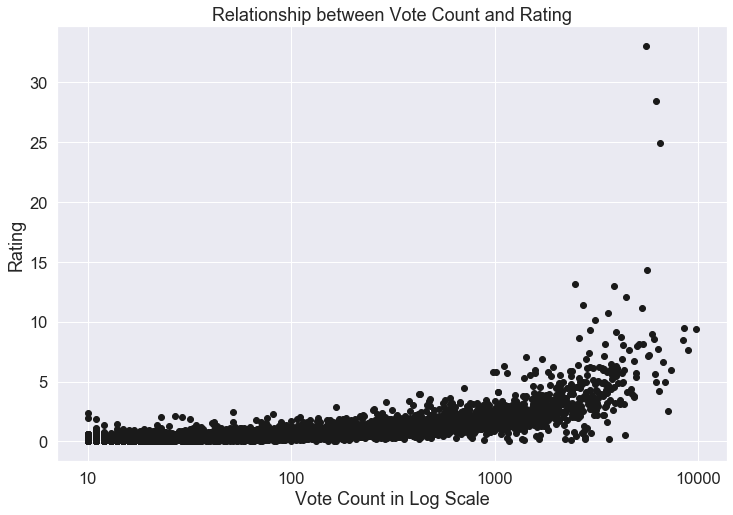

In [19]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x='vote_count', y='popularity', data=df_movie, c='k')
ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Vote Count in Log Scale', ylabel='Rating', title='Relationship between Vote Count and Rating');

It appears there are somewhat relationship between vote count and a movie popularity, the movie get exponentially more popular after more than 1000 people vote for their rating.

First we transform the rating using the famous [IMDB Formula](http://answers.google.com/answers/threadview/id/507508.html) of 
$$ WR = \frac{v}{(v+m)}\,R + \frac{m}{v+m}\,C $$

with $WR$ as weighted rating, $v$ and $R$ are the vote count and vote average ratings respectively. $m$ marked the minimum vote count considered (can be set to median or 90th percentile) and lastly $C$ is the mean vote across all movies. 

In [20]:
m = df_movie.vote_count.quantile(0.9)
C = df_movie.vote_average.mean()
print('Minimum valid votes: {}, Average movie ratings: {}'.format(m, C))

Minimum valid votes: 582.0, Average movie ratings: 5.963387922210849


In [21]:
def weighted_rating(x, m, C):
    '''Calculation using the famous IMDB formula'''
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [22]:
df_movie['weighted_rating'] = df_movie.apply(lambda x: weighted_rating(x, m=m, C=C), axis=1)
df_movie.loc[:, ['vote_count', 'vote_average', 'weighted_rating']]

,vote_count,vote_average,weighted_rating
imdb_id,,,
tt0369610,5562,6.5,6.449169
tt1392190,6185,7.1,7.002245
tt2908446,2480,6.3,6.236020
tt2488496,5292,7.5,7.347751
tt2820852,2947,7.3,7.079567
...,...,...,...
tt0060371,11,7.4,5.990037
tt0060472,20,5.7,5.954637
tt0060161,11,6.5,5.973342


Now the ratings get adjusted based on their vote counts! Next we will see if there are anomalies with budget and revenue features.

In [23]:
df_movie.loc[:, ['budget', 'revenue']].describe()

,budget,revenue
count,9.770000e+03,9.770000e+03
mean,1.618298e+07,4.424026e+07
std,3.221320e+07,1.225998e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,2.000000e+05,0.000000e+00
75%,1.936250e+07,3.105779e+07
max,4.250000e+08,2.781506e+09


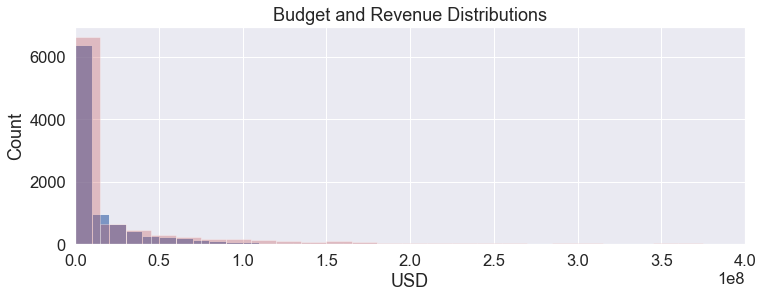

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))

bins1 = np.arange(df_movie.budget.min(), df_movie.budget.max()+1e7, 1e7)
bins2 = np.arange(df_movie.revenue.min(), df_movie.revenue.max()+1.5e7, 1.5e7)
ax.hist(df_movie.budget, bins=bins1, alpha=.7, color='b', label='budget')
ax.hist(df_movie.revenue, bins=bins2, alpha=.3, color='r', label='revenue');
ax.set(xlim=(0, 4e8), xlabel='USD', ylabel='Count', title='Budget and Revenue Distributions');

It appears that from both distributions, there are some movies with zero or very low budget. From kaggle documentation they should be treated as null values, therefore we will also exclude them just for **Question 1** and **Question 2**

In [25]:
# exclude 0 revenue or 0 budget from analysis only for the first two questions
df_movie_reduced = df_movie.loc[(df_movie.budget > 0) & (df_movie.revenue > 0)]

# check if they're still there
print(df_movie_reduced.shape)

(3805, 11)


In [26]:
# select columns for question 1
q1_table = df_movie_reduced.loc[:, ['original_title', 'revenue', 'release_date', 'weighted_rating']].reset_index(drop=True)
q1_table

,original_title,revenue,release_date,weighted_rating
0,Jurassic World,1513528810,2015-06-09,6.449169
1,Mad Max: Fury Road,378436354,2015-05-13,7.002245
2,Insurgent,295238201,2015-03-18,6.236020
3,Star Wars: The Force Awakens,2068178225,2015-12-15,7.347751
4,Furious 7,1506249360,2015-04-01,7.079567
...,...,...,...,...
3800,Who's Afraid of Virginia Woolf?,33736689,1966-06-21,6.136725
3801,Torn Curtain,13000000,1966-07-13,5.988044
3802,El Dorado,6000000,1966-12-17,6.017948
3803,The Sand Pebbles,20000000,1966-12-20,6.010970


In [27]:
movie_count = q1_table.original_title.value_counts()
same_movies = movie_count[movie_count > 1].index.tolist()
unique_movies = df_movie.shape[0]
print('Unique movies: {}'.format(unique_movies))
print('Same movie titles: {}'.format(len(same_movies)))

Unique movies: 9770
Same movie titles: 45


In [28]:
q1_table = q1_table.loc[q1_table.original_title.isin(same_movies)] # filter same movies

# group by movies and find min and max respectively
# revenue will be selected based on the same movie title and release date using inner join
min_q1_table = q1_table.groupby('original_title')['release_date'].min().reset_index(name='release_date')
merge_min = (pd.merge(left=q1_table, right=min_q1_table, left_on=['original_title', 'release_date'], 
                      right_on=['original_title', 'release_date'], how='inner')
               .rename(columns={'revenue': 'min_revenue', 
                                'release_date': 'min_release_date',
                                'weighted_rating': 'min_weighted_rating'})
               .set_index('original_title'))

max_q1_table = q1_table.groupby('original_title')['release_date'].max().reset_index(name='release_date')
merge_max = (pd.merge(left=q1_table, right=max_q1_table, left_on=['original_title', 'release_date'], 
                      right_on=['original_title', 'release_date'], how='inner')
               .rename(columns={'revenue': 'max_revenue', 
                                'release_date': 'max_release_date',
                                'weighted_rating': 'max_weighted_rating'})
               .set_index('original_title'))

summary_q1_table = merge_max.join(merge_min) # join min and max for summary

In [29]:
# calculate differences of release date interval in months and absolute value difference between revenue and ratings
summary_q1_table['diff_year'] = ((summary_q1_table['max_release_date'] - summary_q1_table['min_release_date'])
                                  /np.timedelta64(1, 'Y')).astype(int)
summary_q1_table['diff_rev'] = np.abs(summary_q1_table['max_revenue'] - summary_q1_table['min_revenue'])/1e9
summary_q1_table['diff_rating'] = np.abs(summary_q1_table['max_weighted_rating'] - summary_q1_table['min_weighted_rating'])
summary_q1_table.loc[:, ['diff_year', 'diff_rev', 'diff_rating']].sort_values('diff_year')

,diff_year,diff_rev,diff_rating
original_title,,,
Wanted,1,0.258270,0.281521
Death at a Funeral,3,0.049051,0.277957
Unknown,4,0.127448,0.219217
Beowulf,8,0.194205,0.196860
Fantastic Four,10,0.162602,0.868276
...,...,...,...
Carrie,36,0.048594,0.484447
Psycho,38,0.005141,1.535519
The Great Gatsby,39,0.324507,0.980093


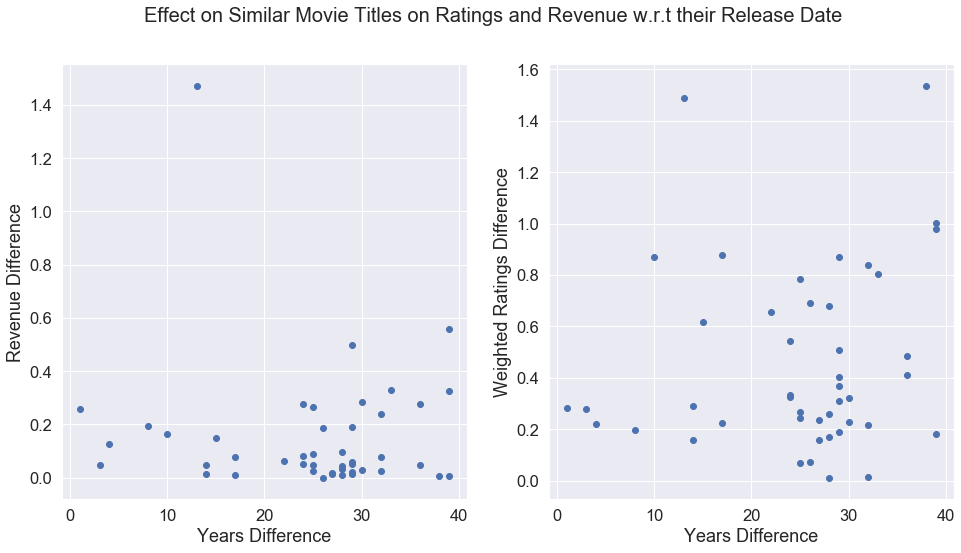

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.scatter(x='diff_year', y='diff_rev', data=summary_q1_table)
ax1.set(xlabel='Years Difference', ylabel='Revenue Difference')

ax2.scatter(x='diff_year', y='diff_rating', data=summary_q1_table)
ax2.set(xlabel='Years Difference', ylabel='Weighted Ratings Difference')

plt.suptitle('Effect on Similar Movie Titles on Ratings and Revenue w.r.t their Release Date', fontsize=20);

It appears there are almost no correlations between release date against their revenue nor against their ratings for similar movie title. Although for movies under 10 years difference, they are clustered to smaller differences in both ratings and revenue and a more scattered pattern for bigger years gap. But one should keep in mind that the revenue might not reflect their profit and smaller revenue does not mean a movie is more successful versus the other with similar title. 

<a id='q2'></a>
### 2. What is the most consistent major film studios? Has they improved or decline throughout the years? Can independent studio shows the same growth?

In [31]:
# make question 2 table using df_movie_reduced
q2_table = df_movie_reduced.loc[:, ['budget', 'revenue', 'release_year']]
q2_table['profit'] = q2_table['revenue'] - q2_table['budget']
q2_table = q2_table.join(production_table.set_index('imdb_id')) # join to get production companies
q2_table.head()

,budget,revenue,release_year,profit,production_companies
imdb_id,,,,,
tt0053604,3000000,25000000,1960,22000000,United Artists
tt0053604,3000000,25000000,1960,22000000,The Mirisch Company
tt0053716,3000000,7100000,1960,4100000,Paramount Pictures
tt0053716,3000000,7100000,1960,4100000,Jerry Lewis Productions
tt0054047,2000000,4905000,1960,2905000,The Mirisch Corporation


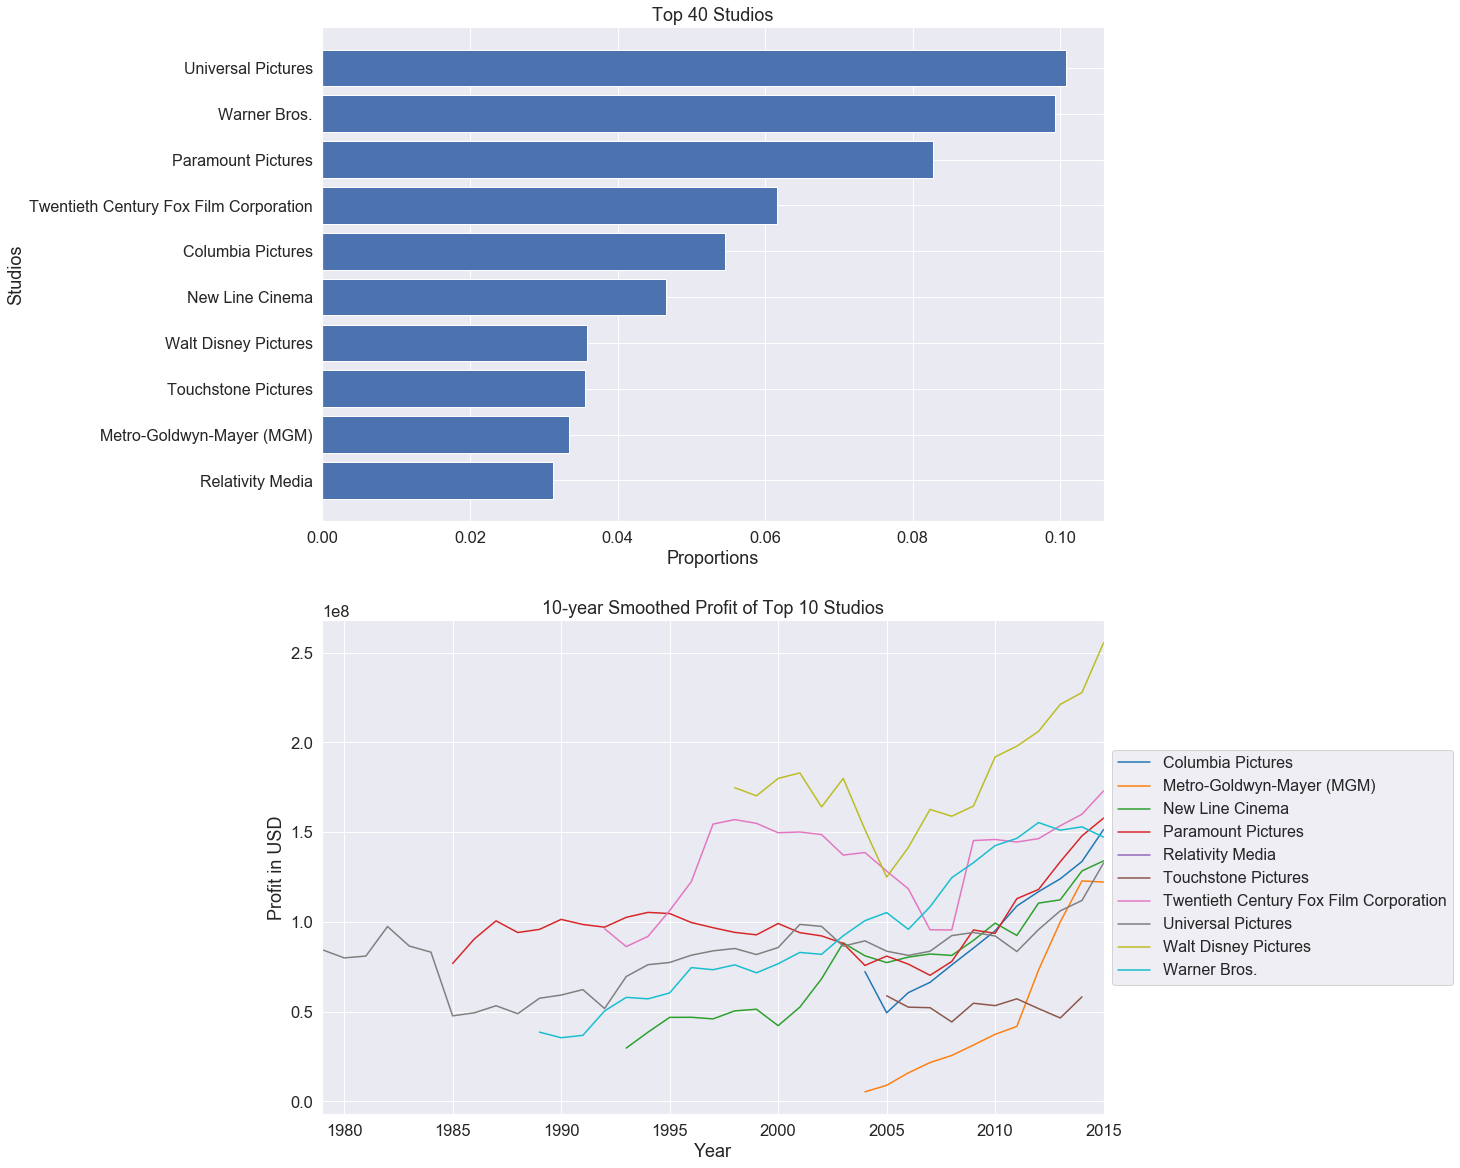

In [32]:
# top 10 production house
top_10 = (q2_table.production_companies.value_counts()/
          q2_table.production_companies.nunique()).head(10).sort_values()
locations = np.arange(len(top_10))
companies = top_10.index.tolist()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 20))
ax1.barh(locations, top_10, align='center')
ax1.set_yticks(locations)
ax1.set_yticklabels(companies, fontsize=16)
ax1.set(xlabel='Proportions', ylabel='Studios', title='Top 40 Studios')

# top 10 revenue year on year
rev_yoy = (q2_table.loc[q2_table.production_companies.isin(companies[-10:])]
           .groupby(['release_year', 'production_companies'])['profit'].mean()
           .reset_index(name='average_profit'))

(rev_yoy.pivot_table(columns='production_companies', index='release_year', values='average_profit')
        .apply(lambda x: x.rolling(window=10).mean().dropna())
        .plot(ax=ax2, colormap='tab10').legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16}))
ax2.set(xlabel='Year', ylabel='Profit in USD', title='10-year Smoothed Profit of Top 10 Studios');

From the bar chart it seems that **Universal Pictures** are the most active studios, followed by **Warner Bross**, then **Paramount**, etc. But if we look at the year-on-year profit of those companies, **Walt Disney** is the number 1 most profitable studio leading consistently since late 90's followed by **20th Century Fox**. Both of them are rank 7th and 4th respectively. The peculiar part is Walt Disney is an old company dated back to before 50's but somehow many of those data are missing.  

<a id='q3'></a>
### Are the popular actor can also make a movie more popular? How about their ratings?

In [33]:
# create question 3 table using the original df_movie
q3_table = df_movie.loc[:, ['popularity', 'weighted_rating']]
q3_table = q3_table.join(cast_table.set_index('imdb_id'))
q3_table.head()

,popularity,weighted_rating,cast
imdb_id,,,
tt0035423,0.883228,5.914568,Meg Ryan
tt0035423,0.883228,5.914568,Hugh Jackman
tt0035423,0.883228,5.914568,Liev Schreiber
tt0035423,0.883228,5.914568,Breckin Meyer
tt0035423,0.883228,5.914568,Natasha Lyonne


After we have our table ready, we make a simple rule-based definitions that if an actor have been casted in more than 20 movies, we will consider them to be popular enough, and if they are below that as not so popular. Using these we can calculate their average ratings as well as average movie popularity.

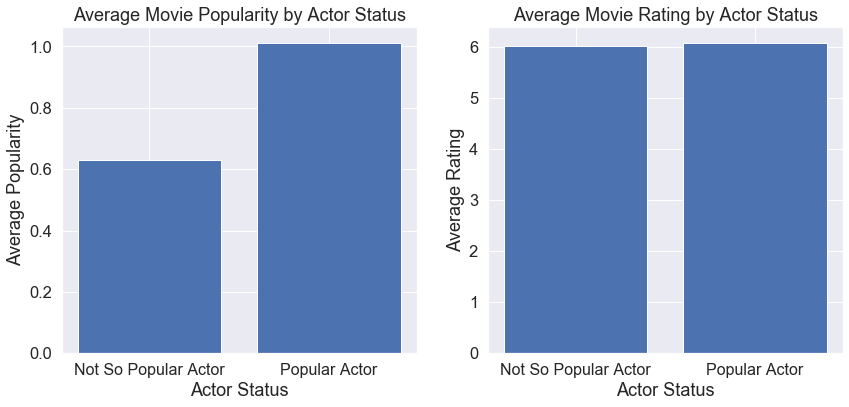

In [34]:
cast_count = q3_table.cast.value_counts()
popular_actors = cast_count[cast_count > 20].index.tolist()

q3_table.loc[q3_table.cast.isin(popular_actors), 'actor_status'] = 'popular'
q3_table.loc[~q3_table.cast.isin(popular_actors), 'actor_status'] = 'not popular'

avg_popularity_by_cast = q3_table.groupby('actor_status')['popularity'].mean()
avg_rating_by_cast = q3_table.groupby('actor_status')['weighted_rating'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.bar(avg_popularity_by_cast.index, avg_popularity_by_cast)
ax1.set_xticklabels(['Not So Popular Actor', 'Popular Actor'], fontsize=16)
ax1.set(xlabel='Actor Status', ylabel='Average Popularity', title='Average Movie Popularity by Actor Status')

ax2.bar(avg_rating_by_cast.index, avg_rating_by_cast)
ax2.set_xticklabels(['Not So Popular Actor', 'Popular Actor'], fontsize=16)
ax2.set(xlabel='Actor Status', ylabel='Average Rating', title='Average Movie Rating by Actor Status');

From the barplot we can see that if a movie contains popular actor have a higher popularity versus a movie that does not have a single popular actor at all. While it interesting to see that their average ratings look almost identical. This could mean that a popular movie with some popular actors can have worse rating compared to mediocre movie with unknown actors.

<a id='conclude'></a>
## Conclusions

- Popularity of a movie seem to have affect willingness of people to rate.
- Similar movie titles w.r.t their release date seems to not affected the overall movie revenue nor their ratings. But this means factors other than that may contribute to both metrics.
- Studio that make a lot of movies and has been around since may not reflect a consistance perfomance over the years compared to newer studio. While in our dataset some of the data missing to get a clearer pictures.
- Actor popularity could possibily make a movie more popular but could not make them a better rating movie. 